In [14]:
from pathlib import Path
path_to_data_notebook = Path.cwd().parent.parent / "Data" / "1_Preprocesed_data.ipynb"
%run {path_to_data_notebook}

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime 
import time
from sklearn.model_selection import train_test_split

# Data

In [15]:
size = 40
x_range_to_cut = 0.001
df = get_whole_preprocessed_dataframe(size, x_range_to_cut)
# choosen property for y:
choosen_property_1 = "Total_pore_volume[cm3/g]"

df_with_data = df[df[choosen_property_1].notna()]    # get data if property are present
df_without_data = df[df[choosen_property_1].isna()]    # get data if property arent present

X = df_with_data['processed_flatten_isotherm_X_Y'] # x = 'processed_flatten_isotherm_X_Y'
y = df_with_data # y - temporary all columns for prediction inspection, in next steps we extract only choosen property

X_train, X_test, y_train_nested, y_test_nested, = train_test_split(X, y, test_size=0.02, random_state=42) #random_state=42

X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train_nested[choosen_property_1].to_numpy()
y_test = y_test_nested[choosen_property_1].to_numpy() 


scaler = StandardScaler() # only for x data
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

print(f'X_train size = {len(X_train)}')
print(f'y_train size = {len(X_train)}')
print(f'X_test size = {len(X_test)}')
print(f'y_test size = {len(X_test)}')

X_without = df_without_data['processed_flatten_isotherm_X_Y'].tolist()
X_without = scaler.transform(X_without) 
y_without = df_without_data[choosen_property_1].to_numpy()
print(f'X_without size = {len(X_without)}')
print(f'y_without size = {len(y_without)}')

/home/pc/moje/python_projects/adsorbents_isotherms/Data/all_data.csv
------------------------------- Preprocessing_data start -------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Article_name                    1011 non-null   object 
 1   Figure_number                   1011 non-null   object 
 2   Sample_name                     1011 non-null   object 
 3   Total_surface_area[m2/g]        928 non-null    float64
 4   Total_pore_volume[cm3/g]        778 non-null    float64
 5   Micropore_volume[cm3/g]         730 non-null    float64
 6   Mesopore_volume[cm3/g]          21 non-null     float64
 7   Average_pore_diameter[nm]       121 non-null    float64
 8   Impregnation_ratio[agent/char]  20 non-null     float64
 9   Activation_type                 33 non-null     object 
 10

In [16]:
lista = []

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

def calculate_time(transcription_time):
    timedelta_obj = datetime.timedelta(seconds=int(transcription_time))
    return str(timedelta_obj)
epochs_number = 500
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(size*2, activation='relu'), 
    tf.keras.layers.Dense(size*4, activation='relu'),
    tf.keras.layers.Dense(size*2, activation='relu'),
    tf.keras.layers.Dense(1)                      
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics=['mae', 'mse']
model.compile(optimizer=optimizer, loss='mse', metrics=metrics)
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history  =  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)
start = time.time()
history  =  model.fit(X_train, y_train, epochs=epochs_number, batch_size=32, validation_split=0.1, verbose=2)
end = time.time()
transcription_time = calculate_time(round((end - start),2))
print(f"Model training time: "+transcription_time)
model.summary()
to_save = [model,"MLP"]
lista.append(to_save)


Num GPUs Available:  1
Epoch 1/500
21/21 - 2s - 116ms/step - loss: 0.1047 - mae: 0.2365 - mse: 0.1047 - val_loss: 0.0445 - val_mae: 0.1715 - val_mse: 0.0445
Epoch 2/500
21/21 - 0s - 4ms/step - loss: 0.0461 - mae: 0.1457 - mse: 0.0461 - val_loss: 0.0356 - val_mae: 0.1415 - val_mse: 0.0356
Epoch 3/500
21/21 - 0s - 4ms/step - loss: 0.0322 - mae: 0.1168 - mse: 0.0322 - val_loss: 0.0255 - val_mae: 0.1140 - val_mse: 0.0255
Epoch 4/500
21/21 - 0s - 4ms/step - loss: 0.0259 - mae: 0.0986 - mse: 0.0259 - val_loss: 0.0238 - val_mae: 0.1192 - val_mse: 0.0238
Epoch 5/500
21/21 - 0s - 4ms/step - loss: 0.0247 - mae: 0.0975 - mse: 0.0247 - val_loss: 0.0163 - val_mae: 0.0949 - val_mse: 0.0163
Epoch 6/500
21/21 - 0s - 4ms/step - loss: 0.0222 - mae: 0.0858 - mse: 0.0222 - val_loss: 0.0239 - val_mae: 0.1101 - val_mse: 0.0239
Epoch 7/500
21/21 - 0s - 4ms/step - loss: 0.0225 - mae: 0.0819 - mse: 0.0225 - val_loss: 0.0203 - val_mae: 0.0980 - val_mse: 0.0203
Epoch 8/500
21/21 - 0s - 4ms/step - loss: 0.0216 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 160)            │        12,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 80)             │        12,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,205 (379.71 KB)

 Trainable params: 32,401 (126.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,804 (253.14 KB)

Metrics: [0.013828226365149021, 0.06545932590961456, 0.013828226365149021]
mae = 0.06545932590961456
mse = 0.013828226365149021


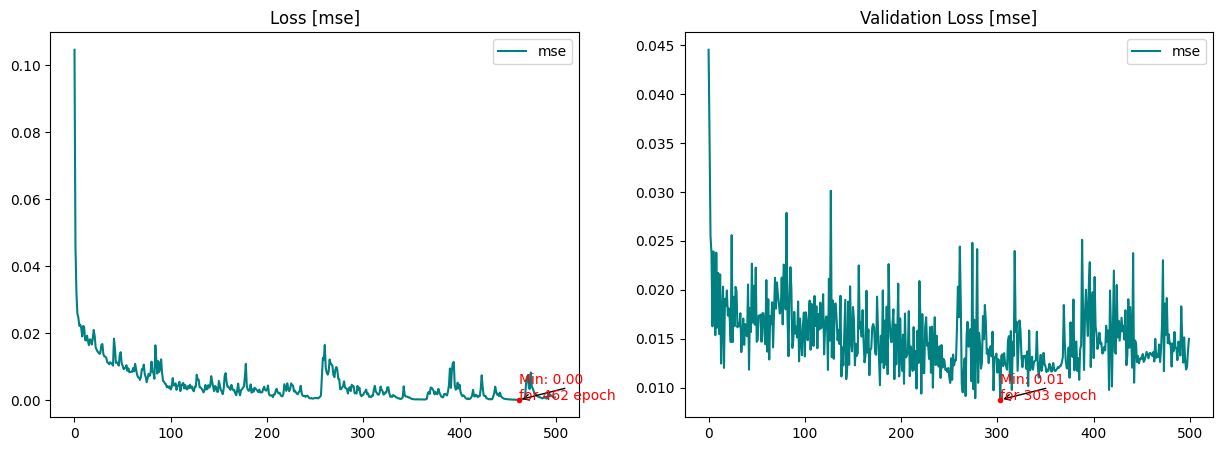

In [17]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")

from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

min_loss_idx = history.history['loss'].index(min(history.history['loss']))
min_loss = min(history.history['loss'])# Get the lowest  value
ax[0].plot(history.history['loss'], color='teal', label='mse')
# ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss [mse]')
ax[0].legend()
ax[0].annotate(f'Min: {min_loss:.2f} \nfor {min_loss_idx} epoch', 
               xy=(min_loss_idx, min_loss), 
               xytext=(min_loss_idx , min_loss ),  # Adjust text position
               arrowprops=dict(facecolor='red', arrowstyle="->"),
               color='red')
ax[0].plot(min_loss_idx, min_loss, 'ro',markersize=3)# Plot a dot at the minimum point


min_val_loss_idx = history.history['val_loss'].index(min(history.history['val_loss']))# Find the index of the minimum 
min_val_loss = min(history.history['val_loss'])# Get the lowest  value
ax[1].plot(history.history['val_loss'], color='teal', label='mse')
# ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Validation Loss [mse]')
ax[1].legend()
# Annotate the lowest point on the validation loss curve
ax[1].annotate(f'Min: {min_val_loss:.2f} \nfor {min_val_loss_idx} epoch', 
               xy=(min_val_loss_idx, min_val_loss), 
               xytext=(min_val_loss_idx, min_val_loss),  # Adjust text position
               arrowprops=dict(facecolor='red', arrowstyle="->"),
               color='red')
ax[1].plot(min_val_loss_idx, min_val_loss, 'ro', markersize=3)# Plot a dot at the minimum point

# ax[2].plot(history.history['val_mse'], color='teal', label='regress loss')
# # ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
# ax[2].title.set_text('Validation mse')
# ax[2].legend()

plt.show()

# fig.savefig('zwykle.jpg', dpi=100)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
to_save = [model,"LinearRegression"]
lista.append(to_save)

from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=10000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
model.fit(X_train, y_train.ravel())  # y.ravel() because fit() expects 1D targets
to_save = [model,"SGDRegressor"]
lista.append(to_save)

from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1, solver="cholesky")
model.fit(X_train, y_train)
to_save = [model,"Ridge"]
lista.append(to_save)

from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
to_save = [model,"Lasso"]
lista.append(to_save)

from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)
to_save = [model,"ElasticNet"]
lista.append(to_save)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X_train, y_train)
to_save = [model,"TreeRegressor"]
lista.append(to_save)

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor( n_neighbors=2 )
model.fit(X_train, y_train)
to_save = [model,"KNeighbors"]
lista.append(to_save)

from sklearn.svm import LinearSVR
model = LinearSVR(epsilon=0.5, dual=True, random_state=42)
model.fit(X_train, y_train)
to_save = [model,"LinearSVR"]
lista.append(to_save)

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)
to_save = [model,"GBRegressor"]
lista.append(to_save)

from sklearn.ensemble import HistGradientBoostingRegressor
model =  HistGradientBoostingRegressor(categorical_features=[0], random_state=42)
model.fit(X_train, y_train)
to_save = [model,"HistGBRegressor"]
lista.append(to_save)


/home/pc/.cache/pypoetry/virtualenvs/adorbents-isotherms-FmcCsTt1-py3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Max error: [0.33472425] dla MLP        Data119 6 Xp0.80  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.25782955807429453 dla LinearRegression        Data77 3_1 PAC200-2  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.24479622760283049 dla SGDRegressor        Data77 3_1 PAC200-2  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.2546226489493433 dla Ridge        Data77 3_1 PAC200-2  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.27821609616670784 dla Lasso        Data77 3_1 PAC200-2  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.27503575854949214 dla ElasticNet        Data77 3_1 PAC200-2  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.3478185897435898 dla TreeRegressor        Data134 1 AC_60-400-1  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.3285 dla KNeighbors        Data77 3_1 PAC200-2  for error tres

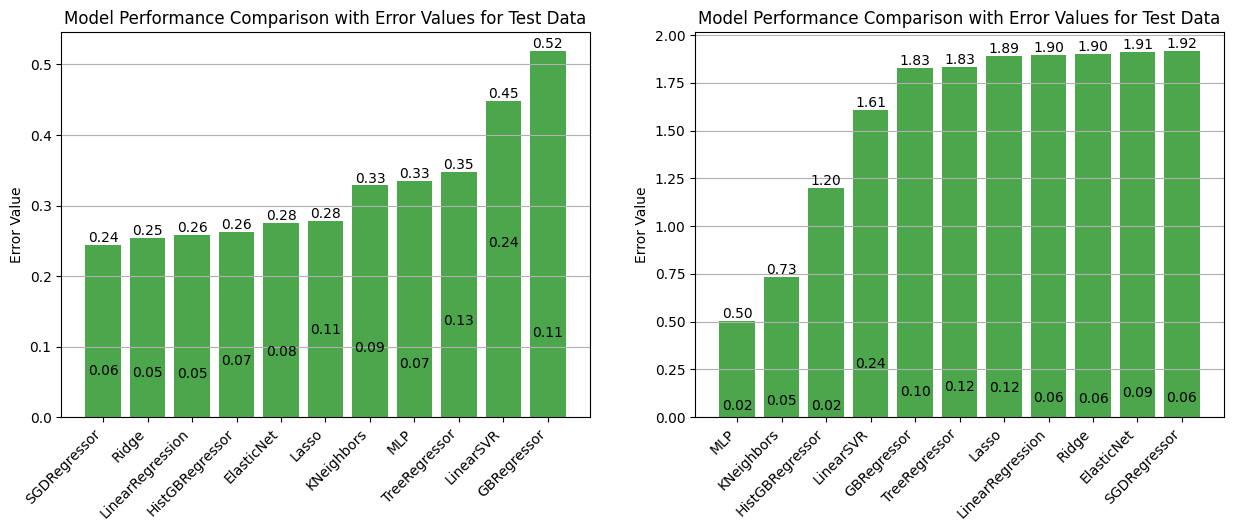

In [40]:
max_errors_from_models = []
list_for_plot = []
for model, name in lista:
    predictions_test = model.predict(X_test)
    y_test_for_compare = y_test
    y_dataframe = y_test_nested
    error_threshold = 30
    max_error_threshold = 30
    list_below =[]
    list_above=[]
    errors = []
    for i in range(len(predictions_test)):
        data_name = y_dataframe.iloc[i,0]
        graph_number = y_dataframe.iloc[i,1]
        sample_name = y_dataframe.iloc[i,2]
        error = abs(predictions_test[i] - y_test_for_compare[i])
        errors.append(error)
        if(error_threshold<=error):
            list_above.append(i)
        else: list_below.append(i)
    max_error_index = errors.index(max(errors))
    max_error_data_name = y_dataframe.iloc[max_error_index,0]
    max_error_graph_number = y_dataframe.iloc[max_error_index,1]
    max_error_sample_name = y_dataframe.iloc[max_error_index,2]
    text_to_display = f"Max error: {max(errors)} dla {name}        {max_error_data_name} {max_error_graph_number} {max_error_sample_name}  "   + f"for error treshold[{error_threshold}] - {round((len(list_below)/len(predictions_test))*100,2)}%     {len(list_below)} izotermy na {len(predictions_test)} " 
    print(text_to_display)
    max_errors_from_models.append(max(errors))
    mean = np.mean(errors)
    list_for_plot.append([max(errors),name, mean])
model_with_max_error_index = max_errors_from_models.index(max(max_errors_from_models))
model_with_min_error_index = max_errors_from_models.index(min(max_errors_from_models))
print(f'errors.index(max(errors)) = {max_errors_from_models[model_with_max_error_index]} for {lista[model_with_max_error_index][1]}')
print(f'errors.index(min(errors)) = {max_errors_from_models[model_with_min_error_index]} for {lista[model_with_min_error_index][1]}')

import matplotlib.pyplot as plt
import numpy as np
list_for_plot = sorted(list_for_plot, key=lambda x: x[0])
models =  [item[1] for item in list_for_plot]
errors = [float(item[0].item()) if isinstance(item[0], np.ndarray) else float(item[0]) for item in list_for_plot]
MEANS = [float(item[2]) for item in list_for_plot]

y_pos = np.arange(len(list_for_plot))

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].bar(y_pos, errors,  alpha=0.7, color='g', capsize=5)
ax[0].set_xticks(y_pos, models, rotation=45, ha='right')
ax[0].set_ylabel('Error Value')
ax[0].set_title('Model Performance Comparison with Error Values for Test Data')
for i, error in enumerate(errors):
    ax[0].text(y_pos[i], error , f'{error:.2f}', ha='center', va='bottom')
for i, error in enumerate(MEANS):
    ax[0].text(y_pos[i], error , f'{error:.2f}', ha='center', va='bottom',color='black')
ax[0].grid(axis='y')

# --------------------- train data --------------------------

max_errors_from_models = []
list_for_plot = []
for model, name in lista:
    predictions_test = model.predict(X_train)
    y_test_for_compare = y_train
    y_dataframe = y_train_nested
    error_threshold = 30
    max_error_threshold = 30
    list_below =[]
    list_above=[]
    errors = []
    for i in range(len(predictions_test)):
        data_name = y_dataframe.iloc[i,0]
        graph_number = y_dataframe.iloc[i,1]
        sample_name = y_dataframe.iloc[i,2]
        error = abs(predictions_test[i] - y_test_for_compare[i])
        errors.append(error)
        if(error_threshold<=error):
            list_above.append(i)
        else: list_below.append(i)
    max_error_index = errors.index(max(errors))
    max_error_data_name = y_dataframe.iloc[max_error_index,0]
    max_error_graph_number = y_dataframe.iloc[max_error_index,1]
    max_error_sample_name = y_dataframe.iloc[max_error_index,2]
    text_to_display = f"Max error: {max(errors)} dla {name}        {max_error_data_name} {max_error_graph_number} {max_error_sample_name}  "   + f"for error treshold[{error_threshold}] - {round((len(list_below)/len(predictions_test))*100,2)}%     {len(list_below)} izotermy na {len(predictions_test)} " 
    print(text_to_display)
    max_errors_from_models.append(max(errors))
    mean = np.mean(errors)
    list_for_plot.append([max(errors),name, mean])
model_with_max_error_index = max_errors_from_models.index(max(max_errors_from_models))
model_with_min_error_index = max_errors_from_models.index(min(max_errors_from_models))
print(f'errors.index(max(errors)) = {max_errors_from_models[model_with_max_error_index]} for {lista[model_with_max_error_index][1]}')
print(f'errors.index(min(errors)) = {max_errors_from_models[model_with_min_error_index]} for {lista[model_with_min_error_index][1]}')

list_for_plot = sorted(list_for_plot, key=lambda x: x[0])
models =  [item[1] for item in list_for_plot]
errors = [float(item[0].item()) if isinstance(item[0], np.ndarray) else float(item[0]) for item in list_for_plot]
MEANS = [float(item[2]) for item in list_for_plot]
y_pos = np.arange(len(list_for_plot))
ax[1].bar(y_pos, errors,  alpha=0.7, color='g', capsize=5)
ax[1].set_xticks(y_pos, models, rotation=45, ha='right')
ax[1].set_ylabel('Error Value')
ax[1].set_title('Model Performance Comparison with Error Values for Test Data')
for i, error in enumerate(errors):
    ax[1].text(y_pos[i], error , f'{error:.2f}', ha='center', va='bottom')
for i, error in enumerate(MEANS):
    ax[1].text(y_pos[i], error , f'{error:.2f}', ha='center', va='bottom',color='black')
ax[1].grid(axis='y')
# ax[0].set_tight_layout()
plt.show()


# Test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Max error: [0.33472425] dla MLP        Data119 6 Xp0.80  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.25782955807429453 dla LinearRegression        Data77 3_1 PAC200-2  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.24479622760283049 dla SGDRegressor        Data77 3_1 PAC200-2  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.2546226489493433 dla Ridge        Data77 3_1 PAC200-2  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.27821609616670784 dla Lasso        Data77 3_1 PAC200-2  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.27503575854949214 dla ElasticNet        Data77 3_1 PAC200-2  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.3478185897435898 dla TreeRegressor        Data134 1 AC_60-400-1  for error treshold[30] - 100.0%     15 izotermy na 15 
Max error: 0.3285 dla KNeighbors        Data77 3_1 PAC200-2  for error tres

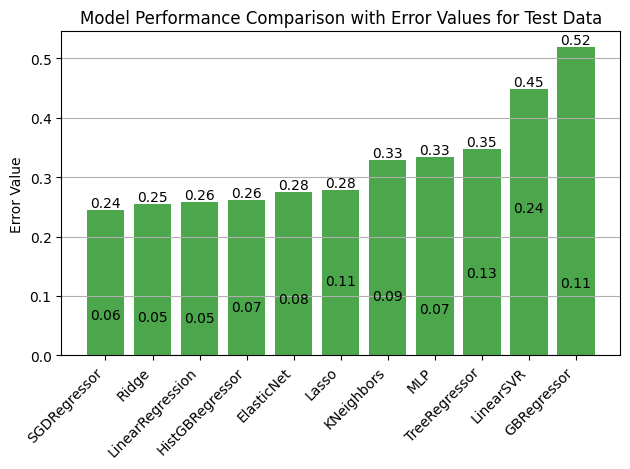

In [36]:
max_errors_from_models = []
list_for_plot = []
for model, name in lista:
    predictions_test = model.predict(X_test)
    y_test_for_compare = y_test
    y_dataframe = y_test_nested
    error_threshold = 30
    max_error_threshold = 30
    list_below =[]
    list_above=[]
    errors = []
    for i in range(len(predictions_test)):
        data_name = y_dataframe.iloc[i,0]
        graph_number = y_dataframe.iloc[i,1]
        sample_name = y_dataframe.iloc[i,2]
        error = abs(predictions_test[i] - y_test_for_compare[i])
        errors.append(error)
        if(error_threshold<=error):
            list_above.append(i)
        else: list_below.append(i)
    max_error_index = errors.index(max(errors))
    max_error_data_name = y_dataframe.iloc[max_error_index,0]
    max_error_graph_number = y_dataframe.iloc[max_error_index,1]
    max_error_sample_name = y_dataframe.iloc[max_error_index,2]
    text_to_display = f"Max error: {max(errors)} dla {name}        {max_error_data_name} {max_error_graph_number} {max_error_sample_name}  "   + f"for error treshold[{error_threshold}] - {round((len(list_below)/len(predictions_test))*100,2)}%     {len(list_below)} izotermy na {len(predictions_test)} " 
    print(text_to_display)
    max_errors_from_models.append(max(errors))
    mean = np.mean(errors)
    list_for_plot.append([max(errors),name, mean])
model_with_max_error_index = max_errors_from_models.index(max(max_errors_from_models))
model_with_min_error_index = max_errors_from_models.index(min(max_errors_from_models))
print(f'errors.index(max(errors)) = {max_errors_from_models[model_with_max_error_index]} for {lista[model_with_max_error_index][1]}')
print(f'errors.index(min(errors)) = {max_errors_from_models[model_with_min_error_index]} for {lista[model_with_min_error_index][1]}')

import matplotlib.pyplot as plt
import numpy as np
list_for_plot = sorted(list_for_plot, key=lambda x: x[0])
models =  [item[1] for item in list_for_plot]
errors = [float(item[0].item()) if isinstance(item[0], np.ndarray) else float(item[0]) for item in list_for_plot]
MEANS = [float(item[2]) for item in list_for_plot]
plt.figure()
y_pos = np.arange(len(list_for_plot))
plt.bar(y_pos, errors,  alpha=0.7, color='g', capsize=5)
plt.xticks(y_pos, models, rotation=45, ha='right')
plt.ylabel('Error Value')
plt.title('Model Performance Comparison with Error Values for Test Data')
for i, error in enumerate(errors):
    plt.text(y_pos[i], error , f'{error:.2f}', ha='center', va='bottom')
for i, error in enumerate(MEANS):
    plt.text(y_pos[i], error , f'{error:.2f}', ha='center', va='bottom',color='black')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Train data

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Max error: [0.50422251] dla MLP        Data60 2 burn-off=15%  for error treshold[30] - 100.0%     729 izotermy na 729 
Max error: 1.8968621462930244 dla LinearRegression        Data120 1 AC-1-OXmw  for error treshold[30] - 100.0%     729 izotermy na 729 
Max error: 1.9183380739445 dla SGDRegressor        Data120 1 AC-1-OXmw  for error treshold[30] - 100.0%     729 izotermy na 729 
Max error: 1.902383250847407 dla Ridge        Data120 1 AC-1-OXmw  for error treshold[30] - 100.0%     729 izotermy na 729 
Max error: 1.8885719188417462 dla Lasso        Data120 1 AC-1-OXmw  for error treshold[30] - 100.0%     729 izotermy na 729 
Max error: 1.9124076187008894 dla ElasticNet        Data120 1 AC-1-OXmw  for error treshold[30] - 100.0%     729 izotermy na 729 
Max error: 1.83064440433213 dla TreeRegressor        Data120 1 AC-1-OXmw  for error treshold[30] - 100.0%     729 izotermy na 729 
Max error: 0.733 dla KNeighbors        Data98 6_2 A-p900  for erro

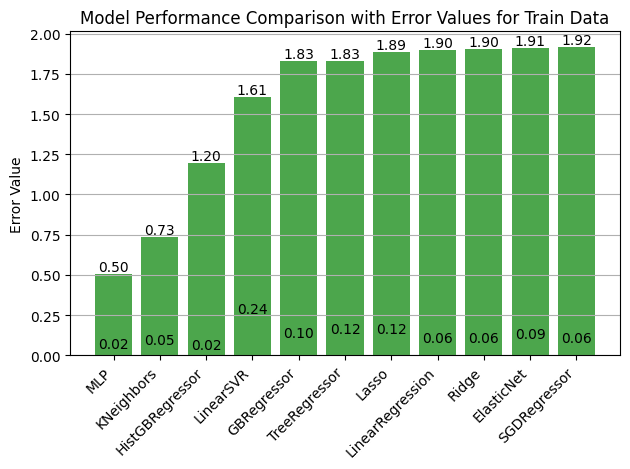

In [37]:
max_errors_from_models = []
list_for_plot = []
for model, name in lista:
    predictions_test = model.predict(X_train)
    y_test_for_compare = y_train
    y_dataframe = y_train_nested
    error_threshold = 30
    max_error_threshold = 30
    list_below =[]
    list_above=[]
    errors = []
    for i in range(len(predictions_test)):
        data_name = y_dataframe.iloc[i,0]
        graph_number = y_dataframe.iloc[i,1]
        sample_name = y_dataframe.iloc[i,2]
        error = abs(predictions_test[i] - y_test_for_compare[i])
        errors.append(error)
        if(error_threshold<=error):
            list_above.append(i)
        else: list_below.append(i)
    max_error_index = errors.index(max(errors))
    max_error_data_name = y_dataframe.iloc[max_error_index,0]
    max_error_graph_number = y_dataframe.iloc[max_error_index,1]
    max_error_sample_name = y_dataframe.iloc[max_error_index,2]
    text_to_display = f"Max error: {max(errors)} dla {name}        {max_error_data_name} {max_error_graph_number} {max_error_sample_name}  "   + f"for error treshold[{error_threshold}] - {round((len(list_below)/len(predictions_test))*100,2)}%     {len(list_below)} izotermy na {len(predictions_test)} " 
    print(text_to_display)
    max_errors_from_models.append(max(errors))
    mean = np.mean(errors)
    list_for_plot.append([max(errors),name, mean])
model_with_max_error_index = max_errors_from_models.index(max(max_errors_from_models))
model_with_min_error_index = max_errors_from_models.index(min(max_errors_from_models))
print(f'errors.index(max(errors)) = {max_errors_from_models[model_with_max_error_index]} for {lista[model_with_max_error_index][1]}')
print(f'errors.index(min(errors)) = {max_errors_from_models[model_with_min_error_index]} for {lista[model_with_min_error_index][1]}')

import matplotlib.pyplot as plt
import numpy as np
list_for_plot = sorted(list_for_plot, key=lambda x: x[0])
models =  [item[1] for item in list_for_plot]
errors = [float(item[0].item()) if isinstance(item[0], np.ndarray) else float(item[0]) for item in list_for_plot]
MEANS = [float(item[2]) for item in list_for_plot]
plt.figure()
y_pos = np.arange(len(list_for_plot))
plt.bar(y_pos, errors,  alpha=0.7, color='g', capsize=5)
plt.xticks(y_pos, models, rotation=45, ha='right')
plt.ylabel('Error Value')
plt.title('Model Performance Comparison with Error Values for Train Data')
for i, error in enumerate(errors):
    plt.text(y_pos[i], error , f'{error:.2f}', ha='center', va='bottom')
for i, error in enumerate(MEANS):
    plt.text(y_pos[i], error , f'{error:.2f}', ha='center', va='bottom',color='black')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [38]:
predictions_for_data_without = model.predict(X_without)
for i in range(len(predictions_for_data_without)):
    print(f'{predictions_for_data_without[i]:.2f}    <---->  {y_without[i]:.2f}   ')

0.10    <---->  nan   
0.16    <---->  nan   
0.12    <---->  nan   
0.08    <---->  nan   
0.81    <---->  nan   
1.11    <---->  nan   
0.82    <---->  nan   
1.00    <---->  nan   
0.43    <---->  nan   
1.13    <---->  nan   
0.51    <---->  nan   
1.35    <---->  nan   
1.65    <---->  nan   
0.25    <---->  nan   
0.34    <---->  nan   
0.29    <---->  nan   
0.32    <---->  nan   
0.53    <---->  nan   
0.37    <---->  nan   
0.38    <---->  nan   
0.54    <---->  nan   
0.63    <---->  nan   
0.40    <---->  nan   
0.48    <---->  nan   
0.53    <---->  nan   
0.33    <---->  nan   
0.30    <---->  nan   
0.20    <---->  nan   
0.41    <---->  nan   
0.28    <---->  nan   
0.06    <---->  nan   
0.07    <---->  nan   
0.07    <---->  nan   
0.08    <---->  nan   
0.07    <---->  nan   
0.16    <---->  nan   
0.08    <---->  nan   
0.38    <---->  nan   
0.45    <---->  nan   
0.44    <---->  nan   
0.39    <---->  nan   
0.43    <---->  nan   
0.37    <---->  nan   
0.42    <--